In [346]:

import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer,make_column_selector
from sklearn.preprocessing import MinMaxScaler,FunctionTransformer,PolynomialFeatures

from sklearn.feature_selection import RFE

from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier,plot_tree

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

from sklearn import set_config

#  Tree and Ensemble models

In [347]:
iris_data, iris_labels = load_iris().data, load_iris().target


In [348]:
iris_data.shape

(150, 4)

In [349]:
iris_data_train, iris_data_test,iris_labels_train, iris_labels_test = train_test_split(
    iris_data,
    iris_labels,
    train_size = 100,
    stratify = iris_labels
    )

In [350]:
iris_data_train.shape,iris_data_test.shape,iris_labels_train.shape,iris_labels_test.shape

((100, 4), (50, 4), (100,), (50,))

In [351]:
tree = DecisionTreeClassifier(
    criterion="entropy"
)

In [352]:
tree.fit(iris_data_train,iris_labels_train)

DecisionTreeClassifier(criterion='entropy')

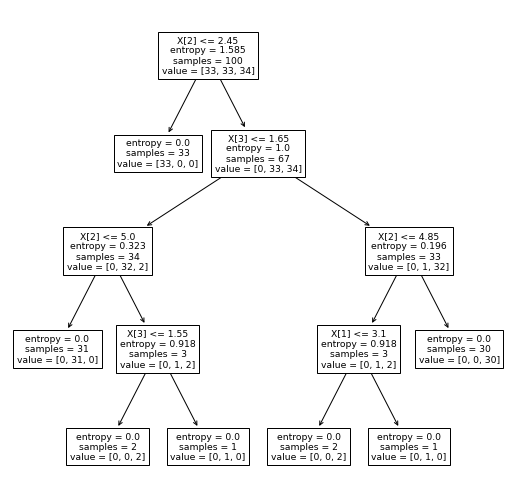

In [353]:
plt.figure(figsize=(9,9))
plot_tree(tree,proportion=False)
plt.show()

In [354]:
tree.feature_importances_

array([0.        , 0.01738298, 0.65257688, 0.33004014])

In [355]:
tree.score(iris_data_train,iris_labels_train)

1.0

In [356]:
tree.score(iris_data_test,iris_labels_test)

0.94

In [357]:
tree = DecisionTreeClassifier(
    criterion="entropy",
    max_depth = 2
)

In [358]:
tree.fit(iris_data_train,iris_labels_train)

DecisionTreeClassifier(criterion='entropy', max_depth=2)

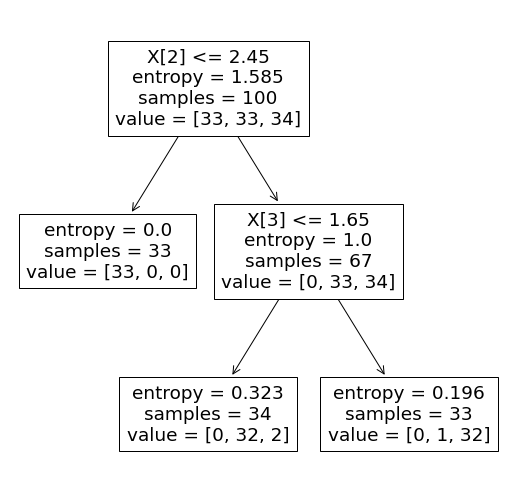

In [359]:
plt.figure(figsize=(9,9))
plot_tree(tree,proportion=False)
plt.show()

In [360]:
tree.score(iris_data_train,iris_labels_train)

0.97

In [361]:
tree.score(iris_data_test,iris_labels_test)

0.94

In [362]:
tree = DecisionTreeClassifier(
    criterion="entropy",
    min_samples_leaf= 5

)

In [363]:
tree.fit(iris_data_train,iris_labels_train)

DecisionTreeClassifier(criterion='entropy', min_samples_leaf=5)

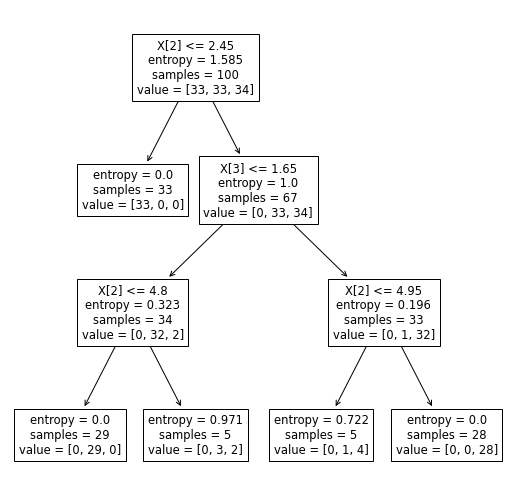

In [364]:
plt.figure(figsize=(9,9))
plot_tree(tree,proportion=False)
plt.show()

In [365]:
print (tree.score(iris_data_train,iris_labels_train))
print(tree.score(iris_data_test,iris_labels_test))

0.97
0.94


In [366]:
tree = DecisionTreeClassifier(
    criterion="gini",
    min_samples_leaf= 5

)

In [367]:
tree.fit(iris_data_train,iris_labels_train)

DecisionTreeClassifier(min_samples_leaf=5)

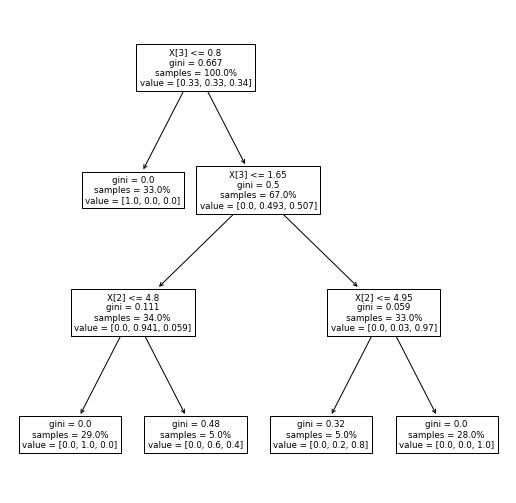

In [368]:
plt.figure(figsize=(9,9))
plot_tree(tree,proportion=True)
plt.show()

In [369]:
print (tree.score(iris_data_train,iris_labels_train))
print(tree.score(iris_data_test,iris_labels_test))

0.97
0.94


In [370]:
forest = [
    DecisionTreeClassifier(splitter="random",max_depth=5),
    DecisionTreeClassifier(splitter="random",max_depth=5),
    DecisionTreeClassifier(splitter="random",max_depth=5)]

In [371]:
forest

[DecisionTreeClassifier(max_depth=5, splitter='random'),
 DecisionTreeClassifier(max_depth=5, splitter='random'),
 DecisionTreeClassifier(max_depth=5, splitter='random')]

In [372]:
for tree in forest:
    tree.fit(iris_data_train,iris_labels_train)

In [373]:
forest[0].feature_importances_

array([0.        , 0.        , 0.09764332, 0.90235668])

In [374]:
forest[1].feature_importances_

array([0.06927852, 0.        , 0.03044511, 0.90027637])

In [375]:
forest[2].feature_importances_

array([0.0436977 , 0.        , 0.09077461, 0.86552769])

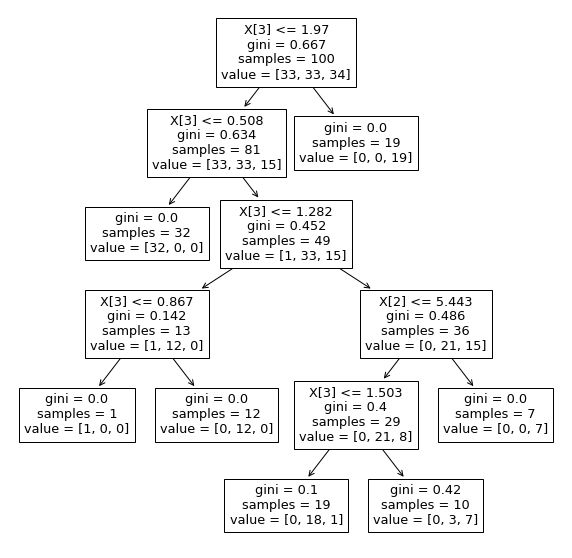

In [376]:
plt.figure(figsize=(10,10))
plot_tree(forest[0])
plt.show()

In [377]:
random_forest = RandomForestClassifier(
    n_estimators= 20, 
    
)

In [378]:
random_forest.fit(iris_data_train,iris_labels_train)

RandomForestClassifier(n_estimators=20)

In [379]:
random_forest.feature_importances_

array([0.05644033, 0.01309128, 0.44751512, 0.48295327])

In [380]:
ada = AdaBoostClassifier(
    base_estimator=DecisionTreeClassifier(max_depth=1),
    n_estimators= 5000
)

In [381]:
ada.fit(iris_data_train,iris_labels_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),
                   n_estimators=5000)

In [382]:
ada.score(iris_data_train,iris_labels_train)

0.95

In [383]:
ada.score(iris_data_test,iris_labels_test)

0.92

In [384]:
ada.estimator_errors_

array([0.33      , 0.04456554, 0.33336482, ..., 0.00036114, 0.3333732 ,
       0.00036114])

In [385]:
set(ada.estimator_weights_)

{1.0}

In [386]:
adult_data =  pd.concat([pd.read_csv("adult.data",header=None,sep=", ",engine = "python")
, pd.read_csv("adult.test",header = None,skiprows=1,engine = "python")])

In [387]:
adult_data = adult_data.reset_index(drop = True)
adult_data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K.
48838,64,?,321403,HS-grad,9,Widowed,?,Other-relative,Black,Male,0,0,40,United-States,<=50K.
48839,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K.
48840,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K.


In [388]:
adult_labels = adult_data[14]
adult_attributes=adult_data.drop(columns=[14])

In [389]:
transformer = ColumnTransformer(
    [
        ("categorical",FunctionTransformer(func = lambda data : pd.get_dummies(data=adult_attributes)),[1,3]+ list(range(5,10)) + [13]),
        ("everything_else",MinMaxScaler(),range(0,14))

    ]
 )

In [390]:
column_selector = make_column_selector(pattern = "capital_" ,dtype_exclude="object")

In [391]:
poly = PolynomialFeatures(degree=3,interaction_only=True)

In [398]:
pipeline = Pipeline([
    ("transformer",transformer),
    ("column_selector","passthrough"),
    ("poly", poly),
    ("classifier",AdaBoostClassifier(DecisionTreeClassifier(max_depth=1), n_estimators=2))
])

In [399]:
set_config(display="diagram")

In [400]:
pipeline

Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('categorical',
                                                  FunctionTransformer(func=<function <lambda> at 0x0000024803C2D1F0>),
                                                  [1, 3, 5, 6, 7, 8, 9, 13]),
                                                 ('everything_else',
                                                  MinMaxScaler(),
                                                  range(0, 14))])),
                ('column_selector', 'passthrough'),
                ('poly', PolynomialFeatures(degree=3, interaction_only=True)),
                ('classifier',
                 AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),
                                    n_estimators=2))])